In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
file1 = "../output/coverage_test/zero_mut_test.csv"
file2 = "../output/coverage_test/coverage_test.csv"
df = pd.read_csv(file1,sep=",")
df2 = pd.read_csv(file2,sep=",")

<Axes: title={'center': 'score'}, xlabel='[coverage, k-length]'>

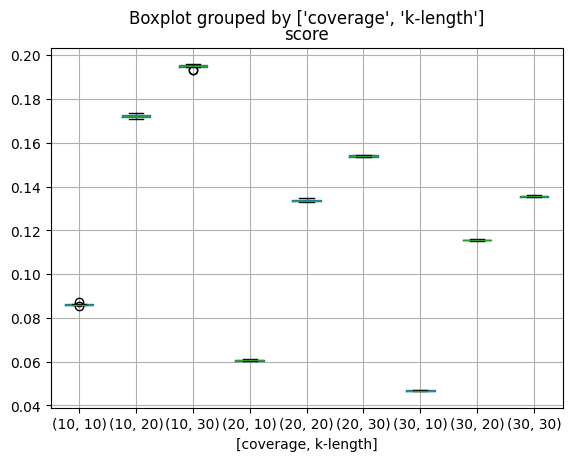

In [3]:
df_box = pd.DataFrame(df, columns=["coverage","score","k-length"])
df_box.boxplot(by=["coverage","k-length"])
# df3

<Axes: title={'center': 'score'}, xlabel='[coverage, k-length]'>

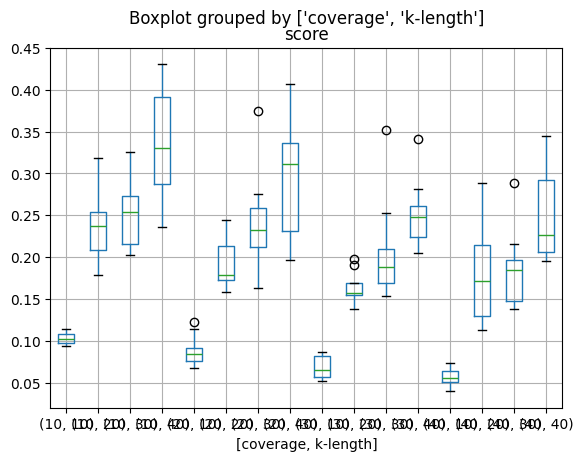

In [4]:
df2_box = pd.DataFrame(df2, columns=["coverage","score","k-length"])
df2_box.boxplot(by=["coverage","k-length"])

In [5]:
file3 = "../output/true_div_test_2.csv"
df3 = pd.read_csv(file3,sep=",")

In [6]:
df_box3 = df3[["num diffs","coverage","k-length","score"]]
df_box3["num diffs"] = df_box3["num diffs"]/2000000

/tmp/ipykernel_656875/3856085377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box3["num diffs"] = df_box3["num diffs"]/2000000


In [7]:
# df_box3 = pd.DataFrame(df, columns=["num diffs","coverage","score","k-length"])
# df_box3.boxplot(by=["coverage","k-length"])
df_box3.groupby(["coverage","k-length"]).corr()

num diffs     score
coverage k-length                               
10       10       num diffs   1.000000  0.864218
                  score       0.864218  1.000000
         20       num diffs   1.000000  0.788921
                  score       0.788921  1.000000
         30       num diffs   1.000000  0.755119
                  score       0.755119  1.000000
         40       num diffs   1.000000  0.945433
                  score       0.945433  1.000000
20       10       num diffs   1.000000  0.933631
                  score       0.933631  1.000000
         20       num diffs   1.000000  0.923619
                  score       0.923619  1.000000
         30       num diffs   1.000000  0.629654
                  score       0.629654  1.000000
         40       num diffs   1.000000  0.644176
                  score       0.644176  1.000000
30       10       num diffs   1.000000  0.810554
                  score       0.810554  1.000000
         20       num diffs   1.000000  0.865388
                  score       0.865388  1.000000
         30       num diffs   1.000000  0.872755
                  score       0.872755  1.000000
         40       num diffs   1.000000  0.732711
                  score       0.732711  1.000000
40       10       num diffs   1.000000  0.938867
                  score       0.938867  1.000000
         20       num diffs   1.000000  0.847604
                  score       0.847604  1.000000
         30       num diffs   1.000000  0.559267
                  score       0.559267  1.000000
         40       num diffs   1.000000  0.463711
                  score       0.463711  1.000000

/tmp/ipykernel_656875/593733237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_656875/593733237.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_656875/593733237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Coeff: 10
[2.90576957]
Coeff: 20
[8.80186171]
Coeff: 30
[8.45249977]
Coeff: 40
[13.13405973]


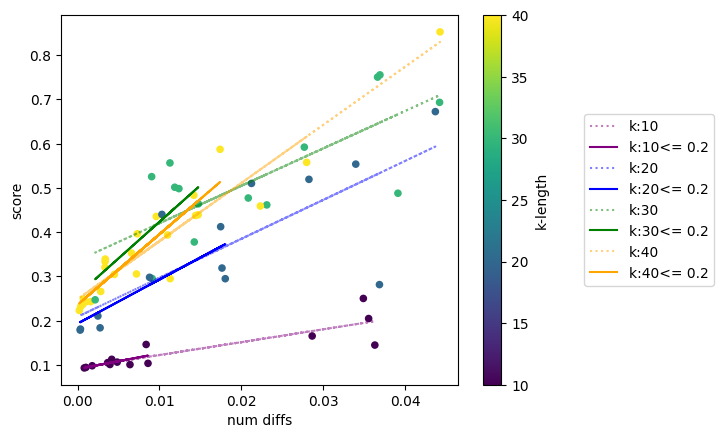

In [12]:
cov_10 = df_box3[df_box3["coverage"]==10]
# cov_10
fig, ax = plt.subplots()
cov_10.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_10[cov_10["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_656875/903538148.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_656875/903538148.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_656875/903538148.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Coeff: 10
[3.64365918]
Coeff: 20
[9.63016931]
Coeff: 30
[5.04520087]
Coeff: 40
[6.58258063]


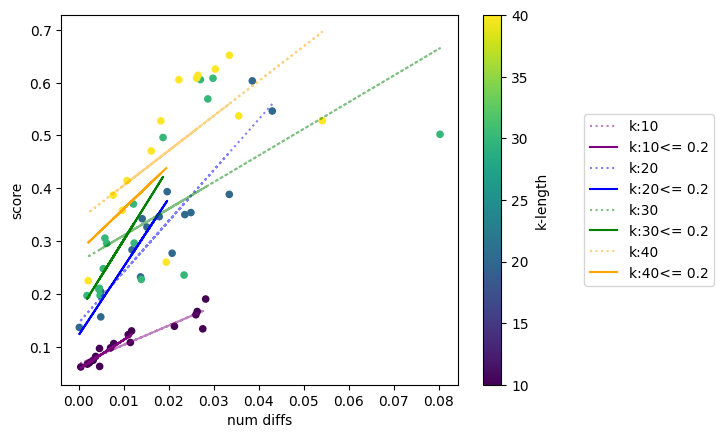

In [9]:
cov_20 = df_box3[df_box3["coverage"]==20]

# cov_20
fig, ax = plt.subplots()
cov_20.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_20[cov_20["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_656875/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_656875/2217191788.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_656875/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Coeff: 10
[2.3996849]
Coeff: 20
[7.70626393]
Coeff: 30
[11.64545785]
Coeff: 40
[12.61321677]


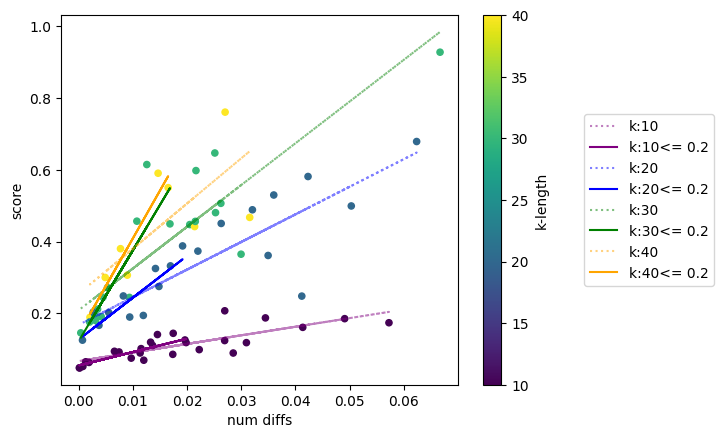

In [10]:
cov_30 = df_box3[df_box3["coverage"]==30]
# cov_10
fig, ax = plt.subplots()
cov_30.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_30[cov_30["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_656875/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_656875/1260264352.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_656875/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Coeff: 10
[2.57051626]
Coeff: 20
[10.2315352]
Coeff: 30
[7.84966002]
Coeff: 40
[5.92397762]


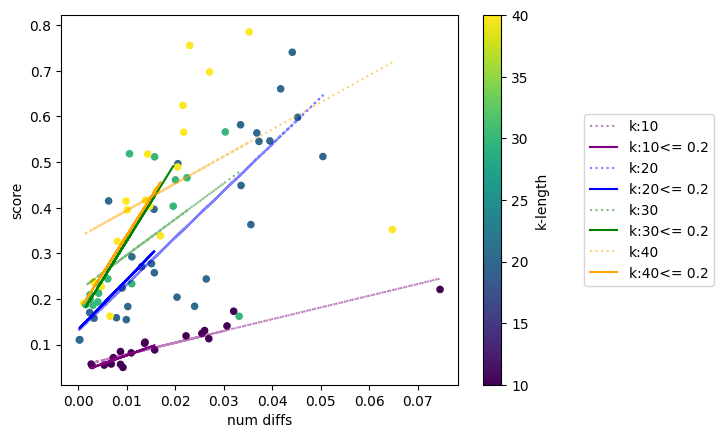

In [11]:
cov_40 = df_box3[df_box3["coverage"]==40]

# cov_10
fig, ax = plt.subplots()
cov_40.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_40[cov_40["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()